# Importing the libraries

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

# Data loading

In [4]:
s_pred = pd.read_csv("C:\\Users\\Dell\\Downloads\\archive (3)\\advertising.csv")
print(s_pred.head())

      TV  Radio  Newspaper  Sales
0  230.1   37.8       69.2   22.1
1   44.5   39.3       45.1   10.4
2   17.2   45.9       69.3   12.0
3  151.5   41.3       58.5   16.5
4  180.8   10.8       58.4   17.9


In [5]:
s_pred.shape

(200, 4)

In [6]:
s_pred.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   Radio      200 non-null    float64
 2   Newspaper  200 non-null    float64
 3   Sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


In [7]:
s_pred.describe()

,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,15.130500
std,85.854236,14.846809,21.778621,5.283892
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,11.000000
50%,149.750000,22.900000,25.750000,16.000000
75%,218.825000,36.525000,45.100000,19.050000
max,296.400000,49.600000,114.000000,27.000000


In [8]:
s_pred.isnull().sum()

TV           0
Radio        0
Newspaper    0
Sales        0
dtype: int64

# Visualization

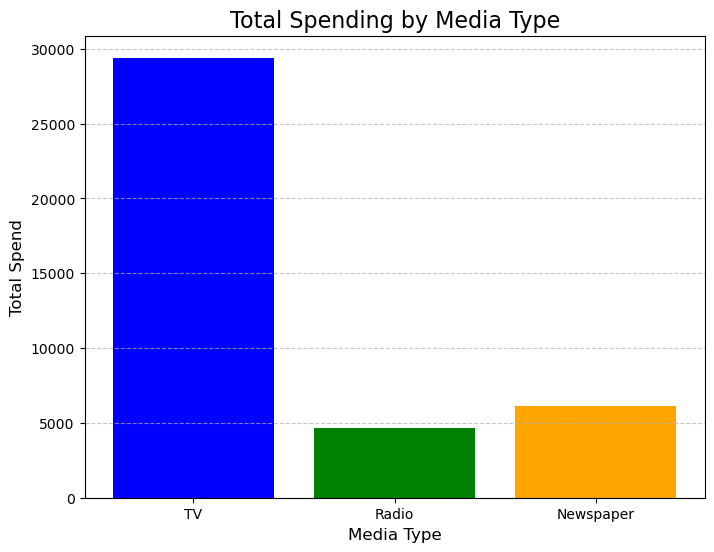

In [10]:
media_sales = {
    'Media': ['TV', 'Radio', 'Newspaper'],
    'Total Spend': [s_pred['TV'].sum(), s_pred['Radio'].sum(), s_pred['Newspaper'].sum()]
}
media_sales_df = pd.DataFrame(media_sales)

# Create a bar plot
plt.figure(figsize=(8, 6))
plt.bar(media_sales_df['Media'], media_sales_df['Total Spend'], color=['blue', 'green', 'orange'])
plt.title('Total Spending by Media Type', fontsize=16)
plt.xlabel('Media Type', fontsize=12)
plt.ylabel('Total Spend', fontsize=12)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

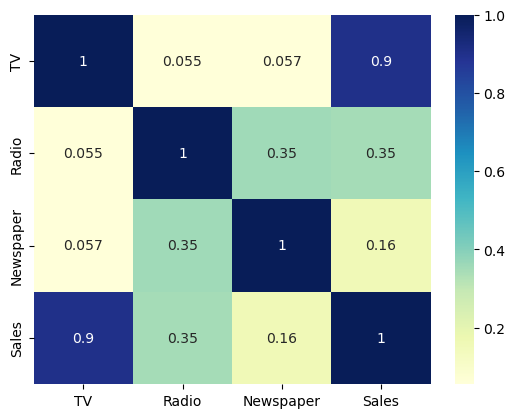

In [11]:
sns.heatmap(s_pred.corr(), cmap="YlGnBu", annot = True)
plt.show()

# Outlier detection

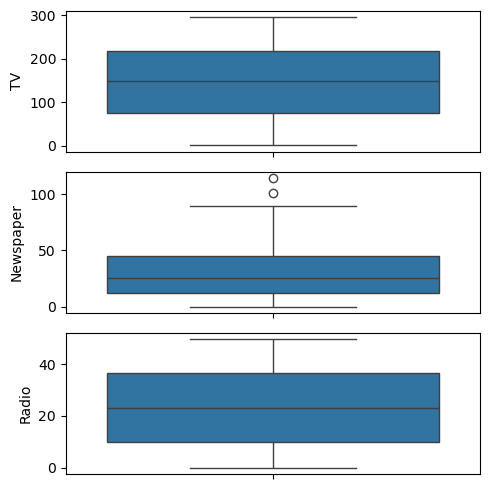

In [13]:
fig, axs = plt.subplots(3, figsize = (5,5))
plt1 = sns.boxplot(s_pred['TV'], ax = axs[0])
plt2 = sns.boxplot(s_pred['Newspaper'], ax = axs[1])
plt3 = sns.boxplot(s_pred['Radio'], ax = axs[2])
plt.tight_layout()

In [14]:
Q1 = s_pred.quantile(0.25)
Q3 = s_pred.quantile(0.75)
IQR = Q3 - Q1

outliers = ((s_pred < (Q1 - 1.5 * IQR)) | (s_pred > (Q3 + 1.5 * IQR))).any(axis=1)
print(f"Number of outliers: {outliers.sum()}")
print(s_pred[outliers])


Number of outliers: 2
        TV  Radio  Newspaper  Sales
16    67.8   36.6      114.0   12.5
101  296.4   36.3      100.9   23.8


In [15]:
# Remove outliers
s_pred_cleaned = s_pred[~outliers]
print(s_pred_cleaned.shape)


(198, 4)


# Linear Regression

In [17]:
X = s_pred['TV']
Y = s_pred['Sales']
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, train_size = 0.7, test_size = 0.3, random_state = 100)

In [18]:
X_train_sm = sm.add_constant(X_train)

lin_reg = sm.OLS(Y_train, X_train_sm).fit()
lin_reg.params

const    6.948683
TV       0.054546
dtype: float64

In [19]:
print(lin_reg.summary())

                            OLS Regression Results                            
Dep. Variable:                  Sales   R-squared:                       0.816
Model:                            OLS   Adj. R-squared:                  0.814
Method:                 Least Squares   F-statistic:                     611.2
Date:                Tue, 24 Dec 2024   Prob (F-statistic):           1.52e-52
Time:                        18:32:26   Log-Likelihood:                -321.12
No. Observations:                 140   AIC:                             646.2
Df Residuals:                     138   BIC:                             652.1
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          6.9487      0.385     18.068      0.0

In [20]:
Y_train_pred = lin_reg.predict(X_train_sm)
res = (Y_train - Y_train_pred)
X_test_sm = sm.add_constant(X_test)
Y_pred = lin_reg.predict(X_test_sm)

# Visualisation on Test and Train

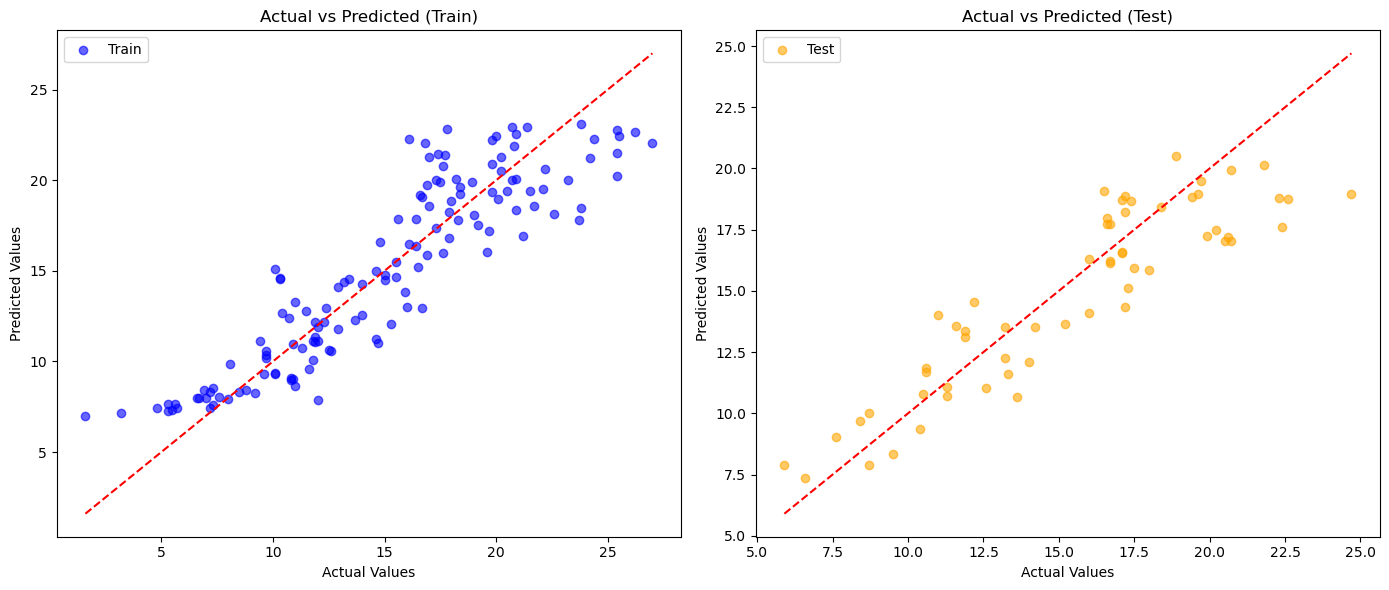

In [22]:
Y_train_pred = lin_reg.predict(X_train_sm)  
residuals_train = Y_train - Y_train_pred 

X_test_sm = sm.add_constant(X_test) 
Y_pred = lin_reg.predict(X_test_sm)  
residuals_test = Y_test - Y_pred  

plt.figure(figsize=(14, 6))

# Train set
plt.subplot(1, 2, 1)
plt.scatter(Y_train, Y_train_pred, alpha=0.6, label='Train', color='blue')
plt.plot([Y_train.min(), Y_train.max()], [Y_train.min(), Y_train.max()], 'r--') 
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs Predicted (Train)')
plt.legend()

# Test set
plt.subplot(1, 2, 2)
plt.scatter(Y_test, Y_pred, alpha=0.6, label='Test', color='orange')
plt.plot([Y_test.min(), Y_test.max()], [Y_test.min(), Y_test.max()], 'r--')  
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs Predicted (Test)')
plt.legend()

plt.tight_layout()
plt.show()

# Train Residuals

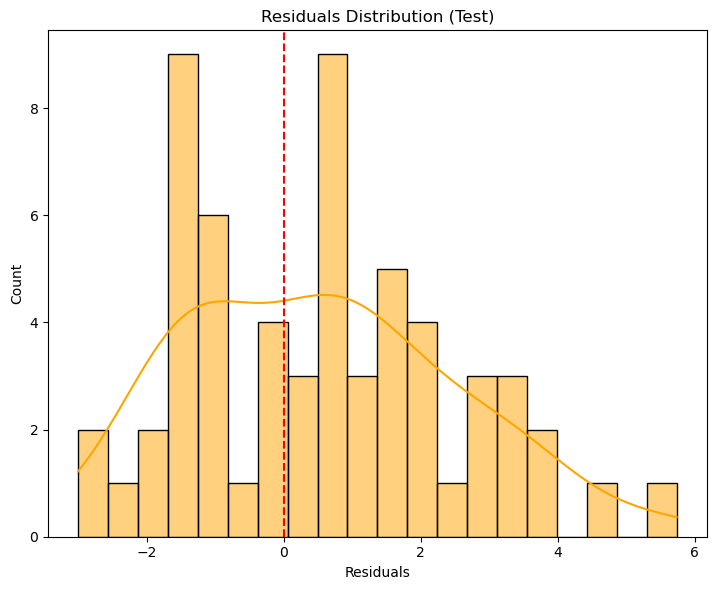

In [24]:
plt.figure(figsize=(14, 6))
plt.subplot(1, 2, 1)
sns.histplot(residuals_test, kde=True, color='orange', bins=20)
plt.axvline(0, color='red', linestyle='--')
plt.title('Residuals Distribution (Test)')
plt.xlabel('Residuals')

plt.tight_layout()
plt.show()


# Calculate metrics

In [26]:
mae = mean_absolute_error(Y_test, Y_pred)
mse = mean_squared_error(Y_test, Y_pred)
rmse = np.sqrt(mse)
r_squared = r2_score(Y_test, Y_pred)

print("Mean Absolute Error (MAE):", mae)
print("Mean Squared Error (MSE):", mse)
print("Root Mean Squared Error (RMSE):", rmse)
print("R-squared (R²):", r_squared)

Mean Absolute Error (MAE): 1.648058986974653
Mean Squared Error (MSE): 4.077556371826953
Root Mean Squared Error (RMSE): 2.019296008966232
R-squared (R²): 0.7921031601245659


# Accuracy

In [28]:
tolerance = 5 
accuracy_within_tolerance = np.mean(np.abs(Y_test - Y_pred) <= tolerance) * 100
print(f"Accuracy within ±{tolerance}: {accuracy_within_tolerance:.2f}%")

Accuracy within ±5: 98.33%
